**Dima Tsvetkov**

**NetID: dt169**

**Homework #3**

Agreement 1) This assignment represents my own work. I did not work on this assignment with
others. All coding was done by myself.

Agreement 2) I understand that if I struggle with this assignment that I will reevaluate whether
this is the correct class for me to take. I understand that the homework only gets harder.

Problem1:Linearregressiononasimpledataset(30 pts)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import struct
from array import array
from os.path import join
import os

In [2]:
XY_raw = pd.read_csv('Concrete_Data_Yeh.csv')
XY_raw

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
XY_raw.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<AxesSubplot:>

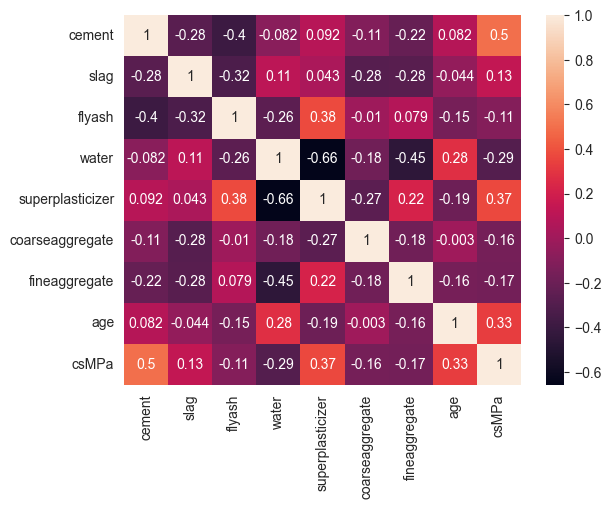

In [4]:
sns.heatmap(XY_raw.corr(), annot=True)

Processing the data.

In [5]:
X = XY_raw.iloc[:, :-1]
y = XY_raw.iloc[:, -1]

In [6]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)
print(reg.score(X, y), '\n', reg.coef_, reg.intercept_)

0.6155198704142721 
 [ 0.11980433  0.10386581  0.08793432 -0.14991842  0.2922246   0.01808621
  0.02019035  0.11422207] -23.33121358490328


In [7]:
print(reg.predict(X))

[53.46346329 53.73475651 56.81258504 ... 26.46841169 29.12237014
 31.89770807]


First, let's find the derivatives of MSE loss function with respect to weights (including the bias $\beta_0$).
$$MSE=\frac{1}{N}\sum_{i=1}^{N}(Y_i - X_i\beta - \beta_0)^2.$$
Thus, the derivative with respect to weight $\beta$:
$$\frac{\partial MSE}{\partial \beta}=-\frac{2}{N}\sum_{i=1}^{N}(Y_i - X_i\beta - \beta_0) X_i$$
and with respect to bias $\beta_0$:
$$\frac{\partial MSE}{\partial \beta_0}=-\frac{2}{N}\sum_{i=1}^{N}(Y_i - X_i\beta - \beta_0)$$

In [8]:
# because it's being used everywhere
def y_predicted(X, coef, bias):
	return np.dot(X, coef.T) + bias

# MSE loss
def MSE(X, y, coef, bias):
	y_pred = y_predicted(X, coef, bias)
	dif = y - y_pred
	# loss = np.mean(dif ** 2)
	loss = np.dot(dif.T, dif) / len(y)
	return loss

# d MSE/d beta
def gradient_beta(X, y, coef, bias):
	dif = y - y_predicted(X, coef, bias)
	# partial = -2 * X.multiply(dif, axis=0)
	# grad = np.mean(partial, axis=0)
	grad = -2 * np.dot(dif.T, X) / len(y)
	return grad

# d MSE/d beta_0
def gradient_beta0(X, y, coef, bias):
	dif = y - y_predicted(X, coef, bias)
	grad = -2 * np.sum(dif) / len(y)
	return grad

coef = np.zeros(np.shape(X)[1])
bias = 0
learning_rate = 0.0000001
learning_rate_bias = 0.01

for i in range(100000):
	coef -= learning_rate * gradient_beta(X, y, coef, bias)
	bias -= learning_rate_bias * gradient_beta0(X, y, coef, bias)
print(coef, bias)


[ 0.12123652  0.10555967  0.09351645 -0.18950174  0.09126383  0.0126318
  0.01858325  0.1147292 ] -9.201705057256499


In [9]:
print(MSE(X, y, coef, bias))
y_predicted(X, coef, bias)

107.68737403149804


array([54.7066665 , 54.89614355, 56.73347123, ..., 26.69252295,
       27.9229699 , 31.41456686])

In [10]:
X_new = X.copy()
X_new['bias'] = np.ones(len(y))
print(np.dot(np.dot((np.linalg.inv(np.dot(X_new.T, X_new))), X_new.T), y))
coef2 = np.array([0.11980433, 0.10386581, 0.08793432, -0.14991842, 0.2922246, 0.01808621, 0.02019035, 0.11422207])
bias2 = -23.331213584903594
print(MSE(X, y, coef2, bias2))

[ 1.19804334e-01  1.03865809e-01  8.79343215e-02 -1.49918419e-01
  2.92224595e-01  1.80862148e-02  2.01903511e-02  1.14222068e-01
 -2.33312136e+01]
107.19723607490728


In [11]:
reg.predict(X)

array([53.46346329, 53.73475651, 56.81258504, ..., 26.46841169,
       29.12237014, 31.89770807])

First, let's find the derivatives of MSE loss function with respect to weights (including the bias $\beta_0$).
$$MSE=\frac{1}{N}\sum_{i=1}^{N}(Y_i - X_i\beta - \beta_0)^2.$$
Thus, the derivative with respect to weight $\beta$:
$$\frac{\partial MSE}{\partial \beta}=(-\frac{2}{N}\sum_{i=1}^{N}(Y_i - X_i\beta - \beta_0))^T X$$
and with respect to bias $\beta_0$:
$$\frac{\partial MSE}{\partial \beta_0}=-\frac{2}{N}\sum_{i=1}^{N}(Y_i - X_i\beta - \beta_0)$$

***Problem2:Multinomial Logistic regression from pre-trained feature extractor(45pts)***
**Step 1**
Loading the pre-trained weight to my feature extractor.

In [12]:
import torch
import torch.nn as nn

class extractor(nn.Module):
	def __init__(self):
		super().__init__()
		self.conv1 = nn.Sequential(
			nn.Conv2d(1, 16, 5, 1, 2),
			nn.ReLU(), nn.MaxPool2d(kernel_size=2))

		self.conv2 = nn.Sequential(
			nn.Conv2d(16, 32, 5, 1, 2),
			nn.ReLU(), nn.MaxPool2d(2))

		self.dim_redu = nn.Sequential(nn.Linear(32 * 7 * 7, 256), nn.Tanh())

	def forward(self, x):
		N, C, W, H = x.shape
		assert C == 1 and W == 28 and H == 28, 'input tensor should be of dimension N*1*28*28'

		x = self.conv1(x)
		x = self.conv2(x)
		# flatten the output of conv2 to (batch_size, 32 * 7 * 7)
		x = x.view(x.size(0), -1)

		return self.dim_redu(x)

In [13]:
feature_extr = extractor()
feature_extr.load_state_dict(torch.load('feature_extractor_weights.pth'))

<All keys matched successfully>

**Step 2**
Reading the files using the standard instruction from the kaggle website (https://www.kaggle.com/code/hojjatk/read-mnist-dataset/notebook)

In [14]:
#
# MNIST Data Loader Class
#
class MnistDataloader(object):
	def __init__(self, training_images_filepath, training_labels_filepath,
	             test_images_filepath, test_labels_filepath):
		self.training_images_filepath = training_images_filepath
		self.training_labels_filepath = training_labels_filepath
		self.test_images_filepath = test_images_filepath
		self.test_labels_filepath = test_labels_filepath
		print()

	def read_images_labels(self, images_filepath, labels_filepath):
		labels = []
		with open(labels_filepath, 'rb') as file:
			magic, size = struct.unpack(">II", file.read(8))
			if magic != 2049:
				raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
			labels = array("B", file.read())

		with open(images_filepath, 'rb') as file:
			magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
			if magic != 2051:
				raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
			image_data = array("B", file.read())
		images = []
		for i in range(size):
			images.append([0] * rows * cols)
		for i in range(size):
			img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
			img = img.reshape(28, 28)
			images[i][:] = img

		return images, labels

	def load_data(self):
		x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
		x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
		return (x_train, y_train), (x_test, y_test)

In [16]:
#
# Verify Reading Dataset via MnistDataloader class
# Set file paths based on added MNIST Datasets
#
input_path = 'input/'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

# checking the files myself
if (
		os.path.isfile(training_images_filepath)
		and os.path.isfile(training_labels_filepath)
		and os.path.isfile(test_images_filepath)
		and os.path.isfile(test_labels_filepath)
):
	print('All files are good')
#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath,
                                   test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()


All files are good



Just collecting some knowledge on the data for myself

In [23]:
print(len(x_train))
print(len(x_test))
print(np.array(x_test).shape)
print(type(x_test))
print(type(x_test[0]))
print(type(x_test[0][0]))
print(y_test[0])

60000
10000
(10000, 28, 28)
<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>
7


In [ ]:
def forward(self, x):
		N, C, W, H = x.shape
		assert C == 1 and W == 28 and H == 28, 'input tensor should be of dimension N*1*28*28'

		x = self.conv1(x)
		x = self.conv2(x)
		# flatten the output of conv2 to (batch_size, 32 * 7 * 7)
		x = x.view(x.size(0), -1)

		return self.dim_redu(x)

torch.Size([10000, 1, 28, 28])


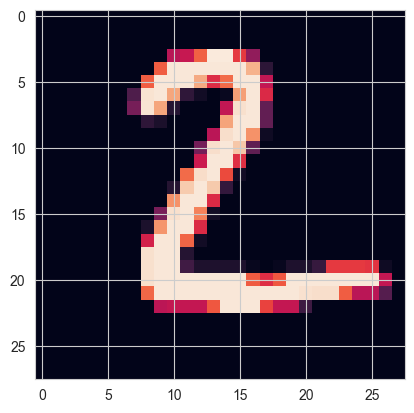

In [30]:
X_test_T = torch.Tensor(np.array(x_test))[None].reshape(-1, 1, 28, 28)
print(X_test_T.shape)
plt.imshow(X_test_T[1][0])

Extracting latent representation (denoted as h ∈ $R^k$) from each sample in MNIST.

In [36]:
X_test = feature_extr.forward(X_test_T)
X_train_T = torch.Tensor(np.array(x_train))[None].reshape(-1, 1, 28, 28)
X_train = feature_extr.forward(X_train_T)

torch.Size([10000, 256]) torch.Size([60000, 256])


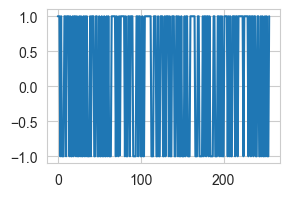

In [48]:
print(X_test.shape, X_train.shape)
plt.figure(figsize=(3, 2))
plt.plot(X_train[0].detach().numpy())

In [127]:
y_train_oh = np.zeros((len(y_train), 10))
y_train_oh[np.arange(len(y_train)), y_train] = 1
y_test_oh = np.zeros((len(y_test), 10))
y_test_oh[np.arange(len(y_test)), y_test] = 1

def CrossEntropyLoss_oh(pred, labels):
    return -torch.mean(torch.sum(labels*torch.log(pred), dim=1))

EPOCHS = 5000  # epochs
ALPHA = 0.005  # learning rate
BATCH = 100    # batch size

# m is the number of examples
# n_x is the input size 28x28=784
m, n_x = X_train.shape

# model
Z = torch.nn.Linear(n_x, 10, bias=True)
torch.nn.init.zeros_(Z.weight)
# A = torch.nn.Softmax(dim=1)
A = torch.nn.Sigmoid()

# training graph and optimization
optimizer = torch.optim.SGD(Z.parameters(), lr=ALPHA)

# loss and accuracy storage
loss_plot = []; accA_plot = []

for epoch in range(EPOCHS + 1):
    # randomic batch definition
    rbatch = np.random.choice(len(y_train), size=BATCH)
    # variables initialization
    X = torch.autograd.Variable(torch.FloatTensor(X_train[rbatch]))
    Y = torch.autograd.Variable(torch.FloatTensor(y_train_oh[rbatch]))
    # training, metrics and storage
    optimizer.zero_grad()
    L = CrossEntropyLoss_oh(A(Z(X)), Y)
    L.backward()
    optimizer.step()

    X_ = torch.autograd.Variable(torch.FloatTensor(X_test))
    Y_ = torch.autograd.Variable(torch.FloatTensor(y_test_oh))

    acc = torch.mean(1 - torch.abs(Y_ - A(Z(X_))))*100

    loss_plot += [L]; accA_plot += [acc]
    if (not epoch % 1000) and (epoch != 0):
            print('epoch: {0:04d} | loss: {1:.3f} | accuracy: {2:06.2f} %'.format(epoch, L, acc))
W_ = Z.weight.detach().numpy()
B_ = Z.bias.detach().numpy()

epoch: 1000 | loss: 0.018 | accuracy: 038.97 %
epoch: 2000 | loss: 0.009 | accuracy: 037.17 %
epoch: 3000 | loss: 0.005 | accuracy: 036.20 %
epoch: 4000 | loss: 0.004 | accuracy: 035.55 %
epoch: 5000 | loss: 0.004 | accuracy: 035.06 %


<Figure size 1600x1000 with 0 Axes>

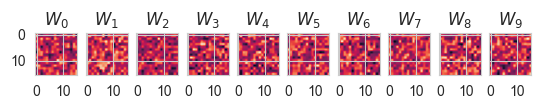

In [56]:
plt.figure(figsize=(16, 10))
fig, AX = plt.subplots(1, 10, sharey=True)

for i in range(10):
    AX[i].imshow(W_[i].reshape(16, 16))
    AX[i].set_title(r'$W_{}$'.format(i))

[2.3008795  2.2518363  2.200018   ... 0.01672769 0.01431526 0.01465705]


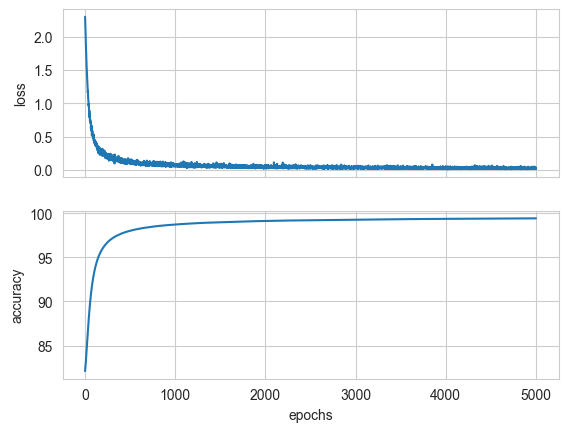

In [68]:
fig, [axA, axB] = plt.subplots(2, 1, sharex=True)
print(torch.tensor(loss_plot).detach().numpy())
axA.plot(torch.tensor(loss_plot).detach())
axA.set_ylabel('loss')
axB.plot(torch.tensor(accA_plot).detach())
axB.set_ylabel('accuracy')

plt.xlabel('epochs')

plt.show()

In [125]:
# https://www.youtube.com/results?search_query=oxxymiron+%D0%B3%D0%B4%D0%B5+%D0%BD%D0%B0%D1%81+%D0%BD%D0%B5%D1%82
Sg = nn.Sigmoid()
y_train_oh = torch.nn.functional.one_hot(torch.tensor(y_train), num_classes=10)
y_test_oh = torch.nn.functional.one_hot(torch.tensor(y_test), num_classes=10)

# print(torch.tensor(y_test).one_hot(num_classes=10))
def cross_entropy_loss(X, y_hot, W, b):
	return 1


def gradient_W(X, y_hot, W, b):
    # d MSE/d beta
    grad = -torch.matmul(torch.matmul(1. - Sg(torch.matmul(W, X.T) + b), X), y_hot)
    return torch.ones(X_test.shape[1])

def gradient_b(X, y_hot, W, b):
    # d MSE/d beta
    grad = -torch.matmul(torch.matmul(1. - Sg(torch.matmul(W, X.T) + b), X), y_hot)
    return 1.

b = 0
W = torch.ones(X_test.shape[1])
# print(W.shape)
# print(X_test.shape)
# A = torch.matmul(W, X_test.T)
# print(A.shape)
# print(torch.matmul(W, X_test.T))

# print(gradient_W(X_test, y_test_oh, W, b).shape)


# def gradient_b(X, y, beta):
#     # d MSE/d beta
#     dif = y - y_predicted(X, beta)
#     grad = -2 * np.dot(dif.T, X) / len(y)
#     return grad
#
# beta2 = np.zeros(np.shape(X_new)[1])
# # have to set different learning rates for beta and bias terms, otherwise I need too many steps
learning_rate = 0.1
learning_rate_bias = 0.2
for i in range(20):
    grad_w = gradient_W(X_test, y_test_oh, W, b)
    grad_b = gradient_b(X_test, y_test_oh, W, b)
    W -= learning_rate * grad_w
    b -= learning_rate_bias * grad_b

print(W)
print(b)

torch.Size([256])
torch.Size([10000, 256])
torch.Size([10000])
